In [1]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder

from sklearn import metrics

%matplotlib inline

In [2]:
df = pd.read_csv("clear_data.csv")


In [3]:
df.drop('Unnamed: 0', axis=1 , inplace=True)

In [4]:
categorical_features = [ 'team','position']
numeric_features = ['height', 'age', 'appearance','goals', 'assists', 'yellow cards','second yellow cards', 'red cards', 'goals conceded','clean sheets', 'minutes played','days_injured','games_injured','award','current_value','highest_value','position_encoded','winger']

In [5]:
for i in categorical_features:
    print (df[i].value_counts())

team
Royal AM FC               30
Al-Batin FC               28
Gangwon FC                28
Daejeon Hana Citizen      28
Jeonbuk Hyundai Motors    28
                          ..
Swansea City              12
Manchester City           11
Paris Saint-Germain       11
Gaziantep FK               5
Hatayspor                  5
Name: count, Length: 374, dtype: int64
position
Attack Centre-Forward         1294
midfield-CentralMidfield      1106
midfield-DefensiveMidfield     867
Defender Left-Back             774
midfield-AttackingMidfield     745
Attack-RightWinger             695
Attack-LeftWinger              694
midfield-RightMidfield          97
midfield-LeftMidfield           97
Attack-SecondStriker            62
midfield                        58
Attack                          40
Name: count, dtype: int64


In [17]:
df = df[['age' , 'current_value']]



In [22]:
X = df


# sacle the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [23]:
min_samples = 2


In [24]:
nn = NearestNeighbors(n_neighbors=min_samples)
nn.fit(X_scaled)
distances, indices = nn.kneighbors(X_scaled)

In [25]:
distances[:,min_samples-1]


array([0., 0., 0., ..., 0., 0., 0.])

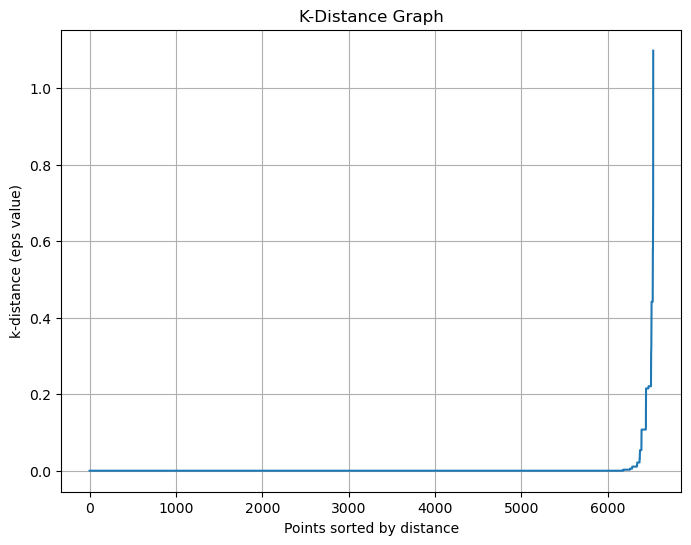

In [26]:
k_dist = distances[:, min_samples-1]

# Sort distances
k_dist_sorted = np.sort(k_dist)

# 3. Plotting the k-distance graph
plt.figure(figsize=(8, 6))
plt.plot(k_dist_sorted)
plt.title('K-Distance Graph')
plt.xlabel('Points sorted by distance')
plt.ylabel('k-distance (eps value)')
plt.grid(True)
plt.show()

In [28]:
clusters = dbscan.fit_predict(X_scaled)


In [29]:
pd.Series(clusters).value_counts()


 1     6403
-1       40
 5       22
 0       13
 2        7
 9        7
 10       6
 11       5
 3        4
 6        4
 4        3
 14       3
 7        3
 8        3
 12       3
 13       3
Name: count, dtype: int64

In [30]:
silhouette_avg = silhouette_score(X, clusters)
silhouette_avg

0.8227060291348949

NameError: name 'chosen_eps' is not defined

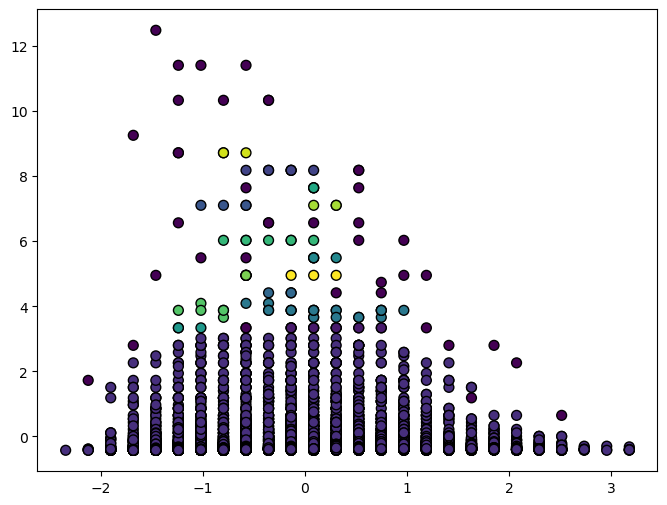

In [31]:
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis', s=50, edgecolor='k')
plt.title(f'DBSCAN Clustering with eps={chosen_eps}')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster Label')
plt.show()

In [32]:
X['dbscan'] = clusters


In [33]:
X['dbscan'].value_counts()


dbscan
 1     6403
-1       40
 5       22
 0       13
 2        7
 9        7
 10       6
 11       5
 3        4
 6        4
 4        3
 14       3
 7        3
 8        3
 12       3
 13       3
Name: count, dtype: int64

<Axes: xlabel='current_value', ylabel='age'>

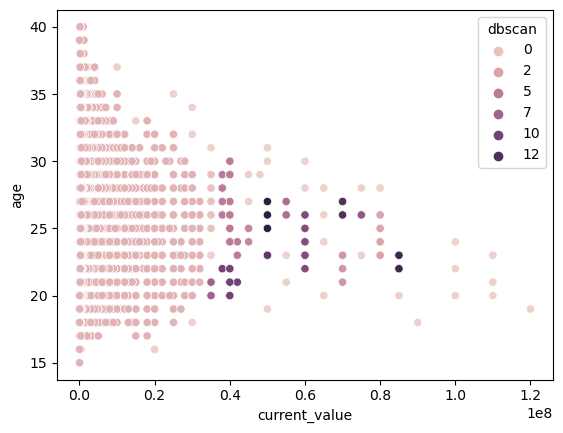

In [34]:
sns.scatterplot(data = X , x = 'current_value', y = 'age', hue = 'dbscan')
